In [ ]:
import pandas as pd
from pathlib import Path

## Reranking Ensemble Experiments

This notebook was used for our Ensemble Reranking Experiment based on RRF (Reciprocal Rank Fusion).

In [73]:
data_path = Path('data')

First we load the results from our finetuned models and merge them into one main Dataframe.

In [74]:
reranked_results_alibaba = pd.read_parquet(data_path / 'reranked_results_alibaba_multilingual_finetuned_static-retrieval-mrl-en-v1_epochs2_crossentropyloss.parquet')
# reranked_results_tinybert = pd.read_parquet(data_path / 'reranked_results_tinyBERT_finetuned_static-retrieval-mrl-en-v1_epochs2_crossentropyloss.parquet')
# reranked_results_alibaba_multilingual = pd.read_parquet(data_path / 'reranked_results_alibaba_finetuned_static-retrieval-mrl-en-v1_epochs2_crossentropyloss.parquet')
# reranked_results_electra = pd.read_parquet(data_path / 'reranked_results_electra_finetuned_static-retrieval-mrl-en-v1_epochs2_crossentropyloss.parquet')
# reranked_results_miniLM6 = pd.read_parquet(data_path / 'reranked_results_miniLM6_finetuned.parquet')
reranked_results_miniLM12 = pd.read_parquet(data_path / 'reranked_results_miniLM12_finetuned_static-retrieval-mrl-en-v1_epochs2_crossentropyloss.parquet')
reranked_results_mxbai = pd.read_parquet(data_path / 'reranked_results_mxbai.parquet')


In [ ]:
# df with post_id, gt, results for every reranker
# merge dataframes on post_id only keep post_id, cord_uid, reranked_topk using the reranker name as suffix

dfs = [
        reranked_results_alibaba[['post_id', 'cord_uid', 'reranked_topk']].rename(columns={'reranked_topk': 'reranked_topk_alibaba'}),
        # reranked_results_tinybert[['post_id', 'cord_uid', 'reranked_topk']].rename(columns={'reranked_topk': 'reranked_topk_tinybert'}),
        # reranked_results_alibaba_multilingual[['post_id', 'cord_uid', 'reranked_topk']].rename(columns={'reranked_topk': 'reranked_topk_alibaba_multilingual'}),
        # reranked_results_electra[['post_id', 'cord_uid', 'reranked_topk']].rename(columns={'reranked_topk': 'reranked_topk_electra'}),
        # reranked_results_miniLM6[['post_id', 'cord_uid', 'reranked_topk']].rename(columns={'reranked_topk': 'reranked_topk_miniLM6'}),
        reranked_results_miniLM12[['post_id', 'cord_uid', 'reranked_topk']].rename(columns={'reranked_topk': 'reranked_topk_miniLM12'}),
        reranked_results_mxbai[['post_id', 'cord_uid', 'reranked_topk']].rename(columns={'reranked_topk': 'reranked_topk_mxbai'}),
        ]


merged_df = dfs[0]
merged_df
for df in dfs[1:]:
    # add reranked_topk column to merged_df
    merged_df = merged_df.merge(df.drop(columns=['cord_uid']), on='post_id', how='inner')

merged_df

,post_id,cord_uid,reranked_topk_alibaba,reranked_topk_miniLM12,reranked_topk_mxbai
0,16,3qvh482o,"[59up4v56, 5hxsagx6, bggera4e, bqn29m9k, 82y56...","[8t2tic9n, 59up4v56, mb18fj8a, 82y56t7d, 6mfd3...","[8t2tic9n, 6mfd3n4s, o4vvlmr4, 5hxsagx6, styav..."
1,69,r58aohnu,"[r58aohnu, kiq6xb6k, 8n4zf9oo, s2vckt2w, yrowv...","[r58aohnu, kiq6xb6k, 8n4zf9oo, zd8c1no7, 6zfpc...","[r58aohnu, yrowv62k, tgd6gy3z, tu1vevx9, pdiyq..."
2,73,sts48u9i,"[sts48u9i, 1uto8vrp, o877uul1, mbam5s7p, 0uoii...","[sts48u9i, 1uto8vrp, sgo76prc, mbam5s7p, vtcq6...","[sts48u9i, gruir7aw, o47v5vgw, o877uul1, mbam5..."
3,93,3sr2exq9,"[3sr2exq9, k0f4cwig, sv48gjkk, tx8ypqsm, 8j3bb...","[3sr2exq9, k0f4cwig, tx8ypqsm, sv48gjkk, kdegn...","[3sr2exq9, k0f4cwig, sv48gjkk, 8j3bb6zx, kdegn..."
4,96,ybwwmyqy,"[rs3umc1x, ybwwmyqy, vabb2f26, lzddnb8j, ouvq2...","[ybwwmyqy, vabb2f26, lzddnb8j, 3l6ipiwk, rs3um...","[ybwwmyqy, ierqfgo5, ouvq2wpq, 3l6ipiwk, vabb2..."
...,...,...,...,...,...
1395,14193,0gn3b98n,"[0gn3b98n, xd5uhah4, 0e97tdez, ticmj3x6, jtwb1...","[0gn3b98n, 0e97tdez, 56rn6d6o, d8x3b9a3, feohc...","[0gn3b98n, d8x3b9a3, xd5uhah4, soa71kwx, hgpii..."
1396,14196,25bdifv6,"[s1gdbsfx, bgiyvqgw, iz6nrfpc, a1xjhfyn, yhmcx...","[lk3w2kqv, yhmcx7ae, zjbyz1vy, lpqdnuil, iz6nr...","[bgiyvqgw, lpqdnuil, upq41f1z, yhmcx7ae, pdiyq..."
1397,14203,qn6wawxk,"[qn6wawxk, dsz66r4u, gatxuwz7, b3ui95vx, wrsk5...","[qn6wawxk, dsz66r4u, wrsk5vh9, b3ui95vx, gg2sw...","[qn6wawxk, wrsk5vh9, b3ui95vx, 2i7zd1t2, yk2th..."
1398,14233,3u3i5myh,"[zrnxq5uq, 6d5tp5hy, mm2aotem, qh6fqna8, u66aw...","[mm2aotem, qh6fqna8, uyo1rpx6, rcrok8lr, zrnxq...","[e4xw6gyp, uyo1rpx6, rcrok8lr, y3vhezw8, zrnxq..."


In [76]:
merged_df.columns[2:]

Index(['reranked_topk_alibaba', 'reranked_topk_miniLM12',
       'reranked_topk_mxbai'],
      dtype='object')

Now follows the RRF algorithm and some code for the evaluation of the experiments.

In [ ]:
# Implements a the RRF (Reciprocal Rank Fusion) algorithm to combine reranked results from multiple models.
def calculate_rrf_scores(row, reranker_columns, k=1):
    reranked_docs = set()
    for col in reranker_columns:
        reranked_docs.update(row[col])
    
    scores = {doc: 0 for doc in reranked_docs}
    for col in reranker_columns:
        for doc in row[col]:
            rank = list(row[col]).index(doc) + 1
            scores[doc] += 1 / (rank + k)
    
    return scores
                            
def get_final_ranking(row, scores):
    return sorted(scores.keys(), key=lambda x: scores[x], reverse=True)

# Define reranker columns
reranker_columns = merged_df.columns[2:]

# Calculate RRF scores and final ranking for each row
merged_df['rrf_scores'] = merged_df.apply(lambda row: calculate_rrf_scores(row, reranker_columns), axis=1)
merged_df['final_ranking'] = merged_df.apply(lambda row: get_final_ranking(row, row['rrf_scores']), axis=1)

def get_performance_mrr(data, col_gold, col_pred, list_k = [1, 5, 10]):
    d_performance = {}
    for k in list_k:
        data["in_topx"] = data.apply(lambda x: (1/([i for i in x[col_pred][:k]].index(x[col_gold]) + 1) if x[col_gold] in [i for i in x[col_pred][:k]] else 0), axis=1)
        d_performance[k] = data["in_topx"].mean()
        print(f"{k = }")
        in_topx = data["in_topx"] > 0
        print(f"Number of queries in top {k}: {in_topx.sum()}")
        print(f"Number of queries not in top {k}: {len(data) - in_topx.sum()}")
    return d_performance

def evaluate_reranked_results(df_query, col_gold='cord_uid', col_pred='reranked_topk', list_k=[1, 5, 10]):
    return get_performance_mrr(df_query, col_gold, col_pred, list_k)


evaluate_reranked_results(merged_df, col_gold='cord_uid', col_pred='final_ranking', list_k=[1, 5, 10])
# evaluate_reranked_results(merged_df, col_gold='cord_uid', col_pred='reranked_topk_mxbai', list_k=[1, 5, 10])

k = 1
Number of queries in top 1: 970
Number of queries not in top 1: 430
k = 5
Number of queries in top 5: 1095
Number of queries not in top 5: 305
k = 10
Number of queries in top 10: 1124
Number of queries not in top 10: 276


{1: np.float64(0.6928571428571428),
 5: np.float64(0.7303333333333334),
 10: np.float64(0.7332315759637189)}

Using reranker columns for plot: ['reranked_topk_alibaba', 'reranked_topk_miniLM12', 'reranked_topk_mxbai', 'rrf_scores']
Testing RRF k = 0
k = 1
Number of queries in top 1: 966
Number of queries not in top 1: 434
k = 5
Number of queries in top 5: 1093
Number of queries not in top 5: 307
k = 10
Number of queries in top 10: 1122
Number of queries not in top 10: 278
Testing RRF k = 1
k = 1
Number of queries in top 1: 965
Number of queries not in top 1: 435
k = 5
Number of queries in top 5: 1093
Number of queries not in top 5: 307
k = 10
Number of queries in top 10: 1123
Number of queries not in top 10: 277
Testing RRF k = 2
k = 1
Number of queries in top 1: 959
Number of queries not in top 1: 441
k = 5
Number of queries in top 5: 1093
Number of queries not in top 5: 307
k = 10
Number of queries in top 10: 1125
Number of queries not in top 10: 275
Testing RRF k = 3
k = 1
Number of queries in top 1: 948
Number of queries not in top 1: 452
k = 5
Number of queries in top 5: 1093
Number of qu

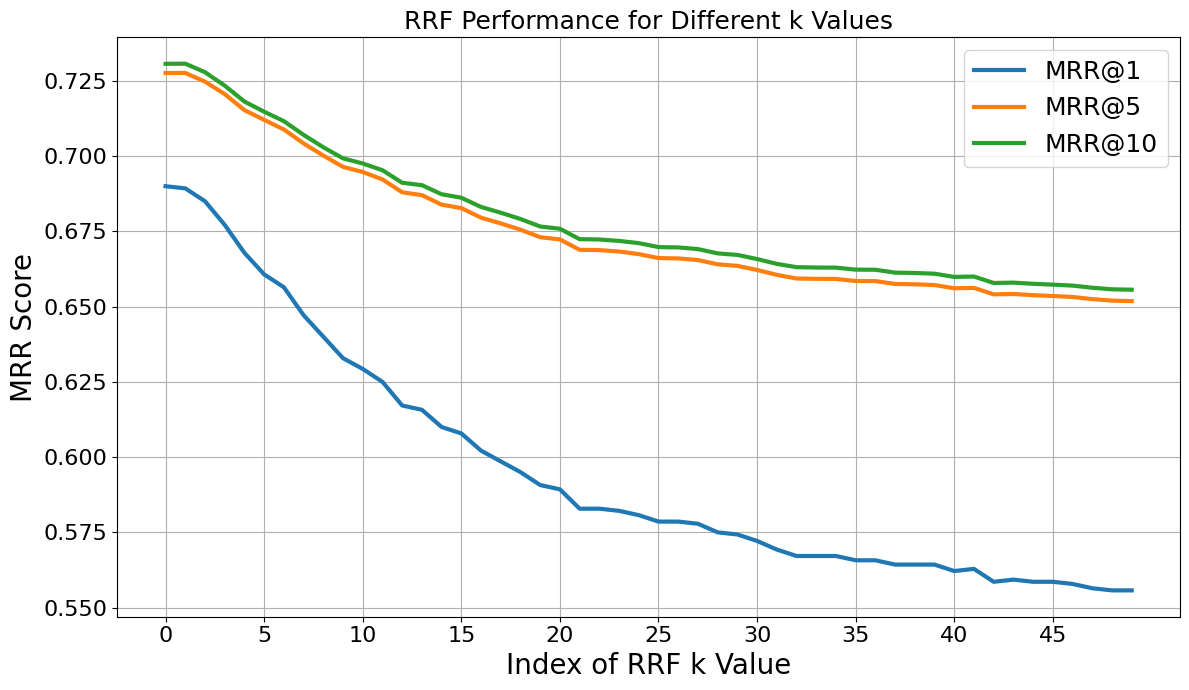

In [1]:
import matplotlib.pyplot as plt

def find_optimal_k_rrf_and_plot(df, reranker_cols, k_values_to_test, mrr_thresholds=[1, 5, 10]):
    """
    Iterates through k values for RRF, calculates MRR, and plots the results.
    """
    results_over_k = {mrr_k: [] for mrr_k in mrr_thresholds}
    temp_df = df.copy() # to avoid modifying the original df

    for rrf_k_val in k_values_to_test:
        print(f"Testing RRF k = {rrf_k_val}")
        # Calculate RRF scores and final ranking for each row with the current rrf_k_val
        temp_df['rrf_scores_temp'] = temp_df.apply(lambda row: calculate_rrf_scores(row, reranker_cols, k=rrf_k_val), axis=1)
        temp_df['final_ranking_temp'] = temp_df.apply(lambda row: get_final_ranking(row, row['rrf_scores_temp']), axis=1)
        
        # Evaluate performance
        # Note: get_performance_mrr modifies the dataframe by adding 'in_topx', 
        # so we pass a copy of the relevant columns.
        eval_df_copy = temp_df[['cord_uid', 'final_ranking_temp']].copy()
        performance = get_performance_mrr(eval_df_copy, 'cord_uid', 'final_ranking_temp', list_k=mrr_thresholds)
        
        for mrr_k in mrr_thresholds:
            results_over_k[mrr_k].append(performance.get(mrr_k, 0))
            
    # plot res
    plt.figure(figsize=(12, 7))
    for mrr_k in mrr_thresholds:
        plt.plot(k_values_to_test, results_over_k[mrr_k], linestyle='-', linewidth=3, label=f'MRR@{mrr_k}')
    
    plt.title('RRF Performance for Different k Values', fontsize=18)
    plt.xlabel('RRF k Value', fontsize=20)
    plt.ylabel('MRR Score', fontsize=20)
    plt.xticks(k_values_to_test[::5], fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(fontsize=18)
    plt.grid(True, zorder=0)
    plt.tight_layout()
    plt.savefig("rrf_performance_vs_k.svg", format="svg")
    plt.show()

    return results_over_k

reranker_columns_for_plot = merged_df.columns[2:-2] # Exclude post_id, cord_uid, rrf_scores, final_ranking if they exist
k_test_range = range(0, 50, 1)  # Test k from 0 to 50 with a step of 1

print(f"Using reranker columns for plot: {list(reranker_columns_for_plot)}")
optimization_results = find_optimal_k_rrf_and_plot(merged_df, reranker_columns_for_plot, k_test_range)

In [79]:
mrr1 = [float(i) for i in optimization_results[1]]
mrr5 = [float(i) for i in optimization_results[5]]
mrr10 = [float(i) for i in optimization_results[10]]

In [80]:
df = pd.DataFrame({
    'k': k_test_range,
    'mrr1': mrr1,
    'mrr5': mrr5,
    'mrr10': mrr10
})